C:\Users\user\AppData\Local\Temp\ipykernel_7920\1892267026.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


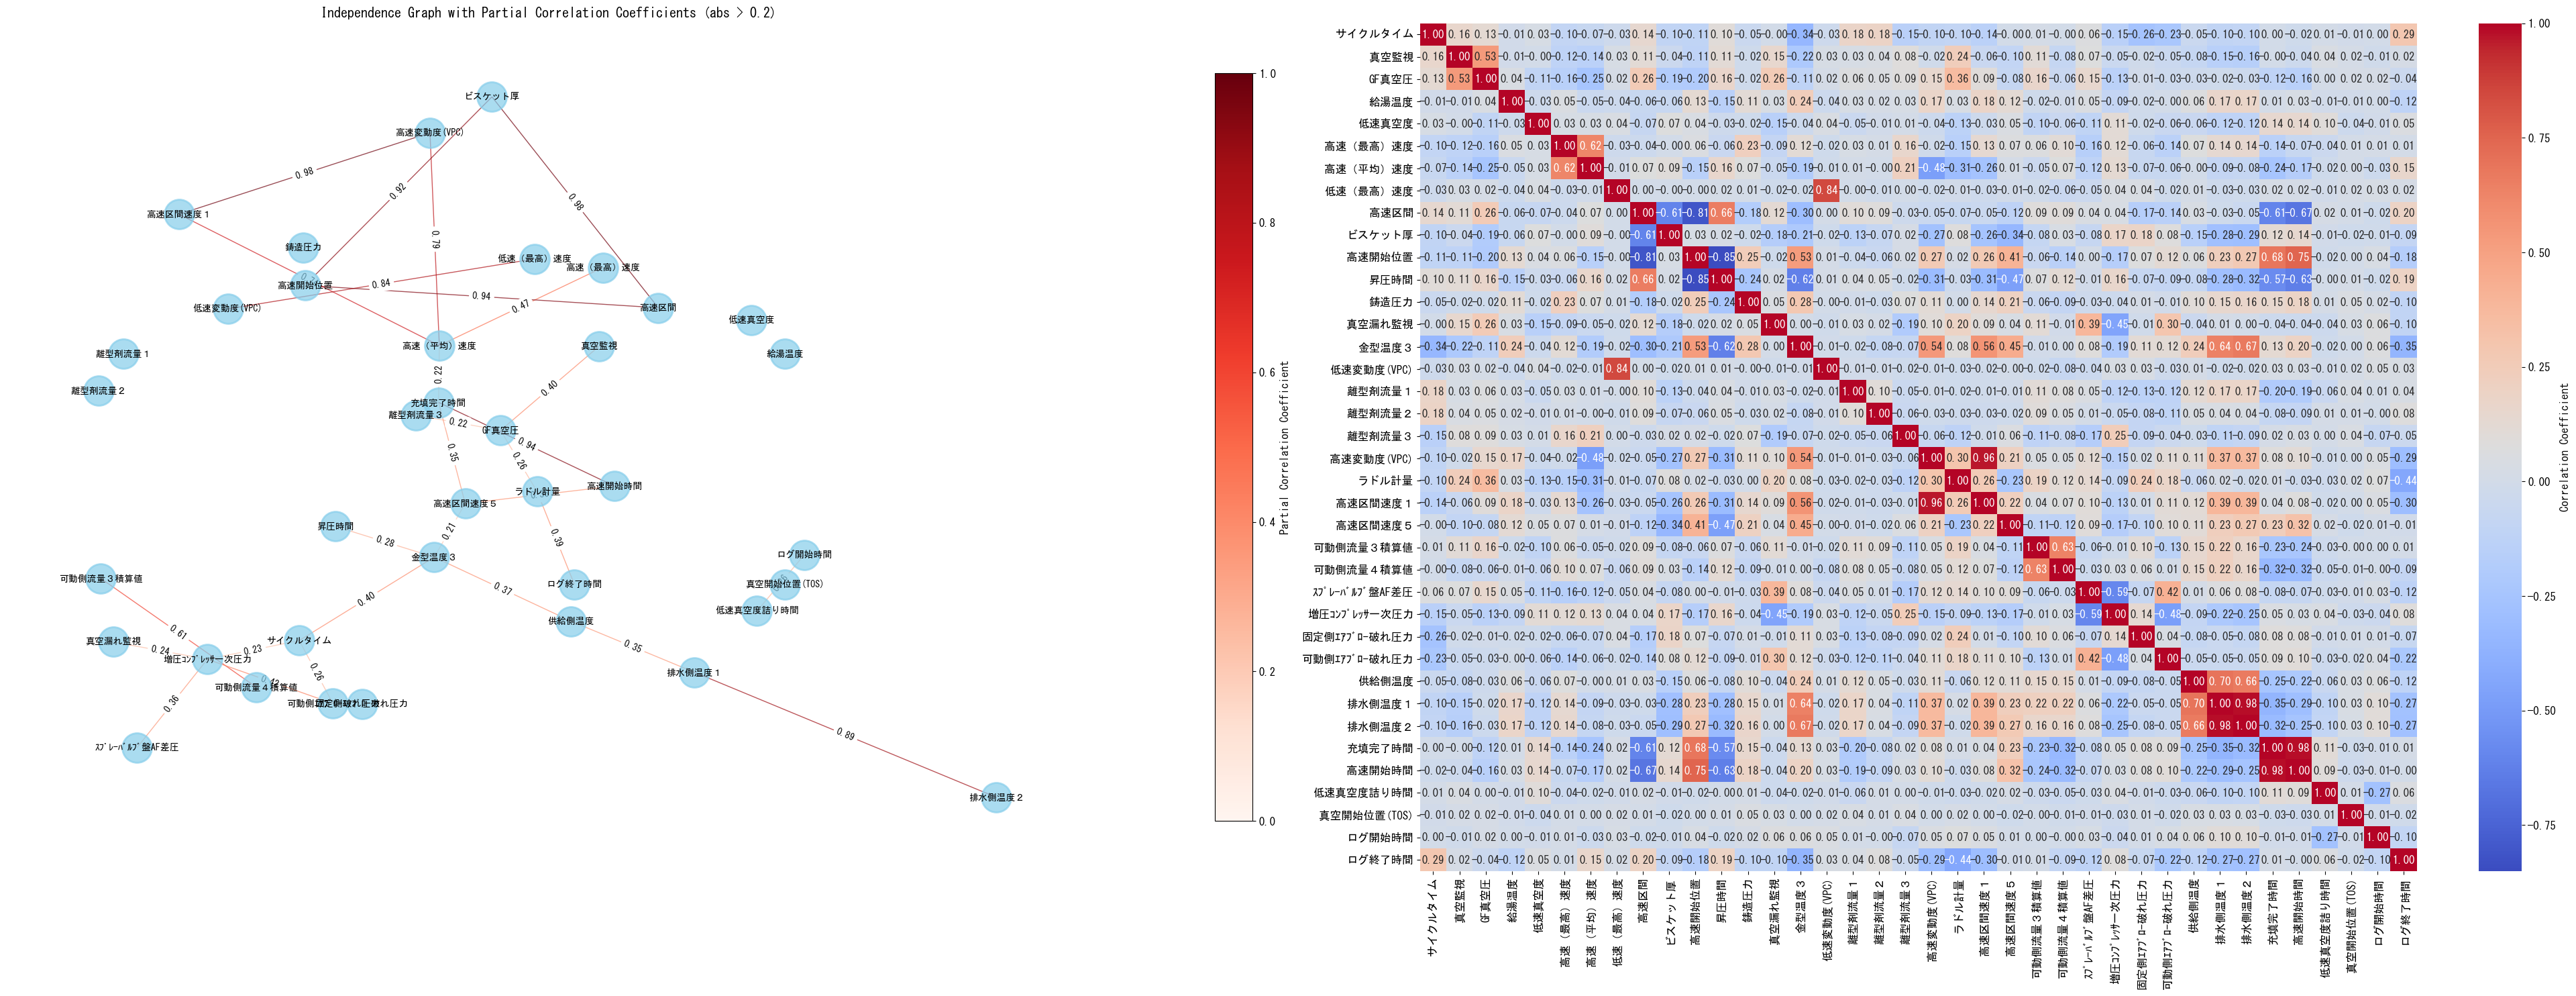

In [76]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 表示するノード間の最低偏相関係数を指定
thres = 0.2

filepass = r'C:\Notebook\231213_K15CCBcrack_analysis\pd4ana_3rd.xlsx'

# フォントの設定（IPAexフォントを使用）
font_path = r'C:\Windows\Fonts\msgothic.ttc'  # フォントのパスを適切に指定してください
font_prop = FontProperties(fname=font_path)

# その他の設定
plt.rcParams['font.family'] = font_prop.get_name()

# ファイルパスを指定してエクセルデータを読み込む
df = pd.read_excel(filepass, header=[0], index_col=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

# 独立グラフの作成
G = nx.Graph()

# 変数間の偏相関を計算し、エッジを追加
for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:
            partial_corr = pg.partial_corr(df, x=var1, y=var2, covar=list(set(df.columns) - {var1, var2}))
            partial_corr_value = partial_corr['r'].values[0]
            G.add_edge(var1, var2, weight=partial_corr_value)

# エッジの重みが閾値未満のものを削除
edges_to_remove = [(var1, var2) for var1, var2, weight in G.edges(data='weight') if abs(weight) <= thres]
G.remove_edges_from(edges_to_remove)

# Ensure all edge weights are non-negative
for _, _, data in G.edges(data=True):
    data['weight'] = abs(data['weight'])

# Check if the graph has negative weights before applying Kamada-Kawai layout
if any(data['weight'] < 0 for _, _, data in G.edges(data=True)):
    raise ValueError("Graph has negative weights. Check and correct the graph edges.")

# ノードの位置を設定 (spring_layoutを使用)
pos = nx.kamada_kawai_layout(G)  # seedを指定して再現性を確保

# カスタムカラーマップを作成
norm = Normalize(vmin=0, vmax=1)
cmap = plt.cm.get_cmap('Reds')

# サブプロットを作成
fig, axs = plt.subplots(1, 2, figsize=(40, 15))

# グラフの描画
weights = [abs(weight) for _, _, weight in G.edges(data='weight')]
edge_colors = [cmap(norm(weight)) for weight in weights]

nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color=edge_colors, linewidths=2, alpha=0.7, ax=axs[0])

# ノードのラベルを描画
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_family=font_prop.get_name(), font_size=10, font_color='black', ax=axs[0])

# エッジの重み（偏相関係数）を表示
edge_labels = {(i, j): f"{partial_corr_value:.2f}" for i, j, partial_corr_value in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family=font_prop.get_name(), ax=axs[0])

# グラフの描画
axs[0].set_title(f'Independence Graph with Partial Correlation Coefficients (abs > {thres})')

# 偏相関ヒートマップの描画
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1], cbar_kws={'label': 'Correlation Coefficient'})

# カラーバーの追加
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[0], orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Partial Correlation Coefficient')

# グラフを表示
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7920\1431778286.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


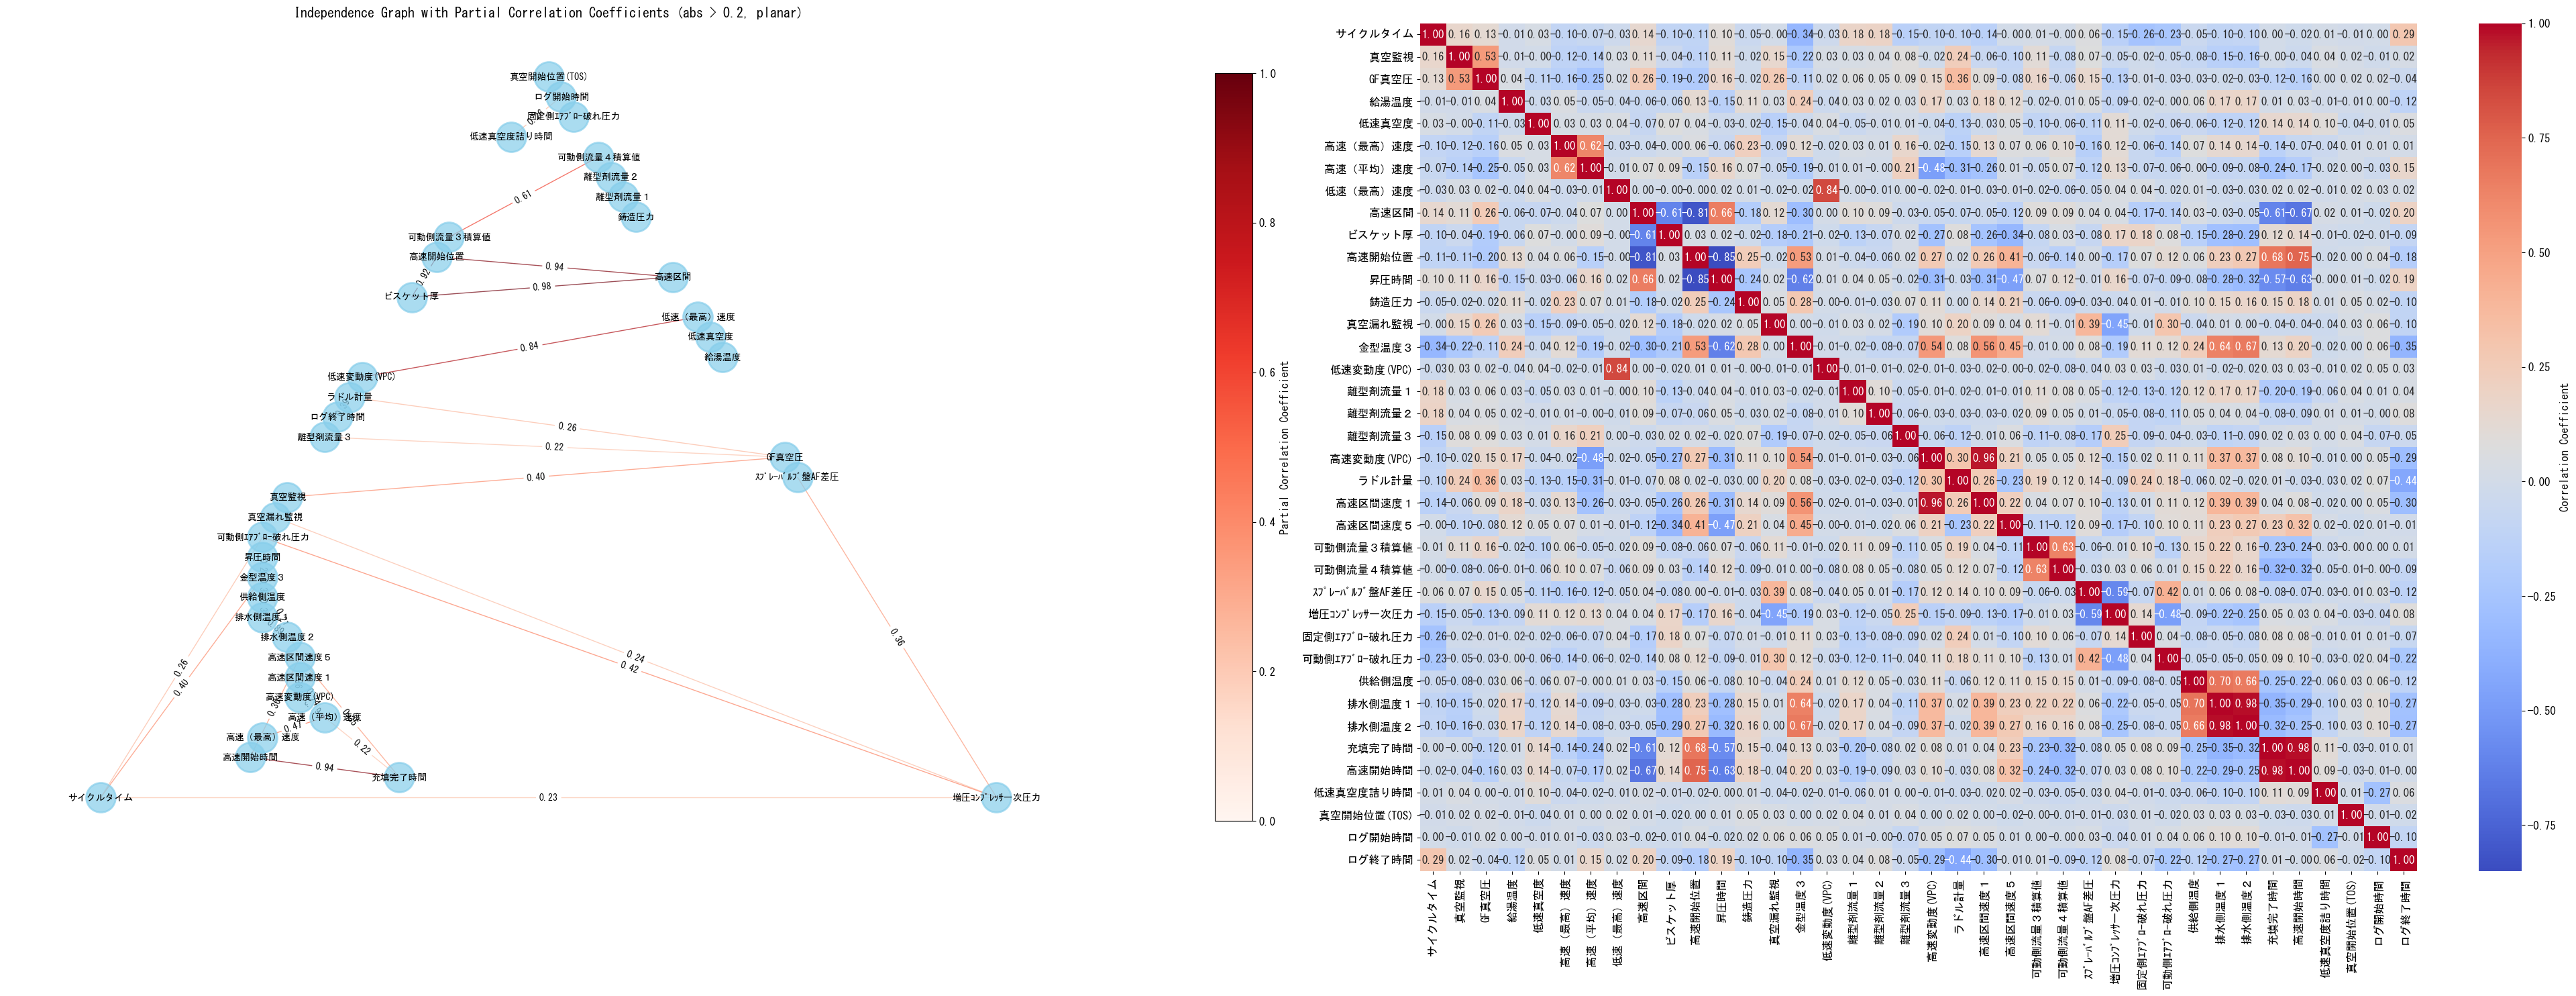

In [75]:
# plainer layout
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 表示するノード間の最低偏相関係数を指定
thres = 0.2

filepass = r'C:\Notebook\231213_K15CCBcrack_analysis\pd4ana_3rd.xlsx'

# フォントの設定（IPAexフォントを使用）
font_path = r'C:\Windows\Fonts\msgothic.ttc'  # フォントのパスを適切に指定してください
font_prop = FontProperties(fname=font_path)

# その他の設定
plt.rcParams['font.family'] = font_prop.get_name()

# ファイルパスを指定してエクセルデータを読み込む
df = pd.read_excel(filepass, header=[0], index_col=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

# 独立グラフの作成
G = nx.Graph()

# 変数間の偏相関を計算し、エッジを追加
for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:
            partial_corr = pg.partial_corr(df, x=var1, y=var2, covar=list(set(df.columns) - {var1, var2}))
            partial_corr_value = partial_corr['r'].values[0]
            G.add_edge(var1, var2, weight=partial_corr_value)

# エッジの重みが閾値未満のものを削除
edges_to_remove = [(var1, var2) for var1, var2, weight in G.edges(data='weight') if abs(weight) <= thres]
G.remove_edges_from(edges_to_remove)

# Ensure all edge weights are non-negative
for _, _, data in G.edges(data=True):
    data['weight'] = abs(data['weight'])

# ノードの位置を設定 (planar_layoutを使用)
pos = nx.planar_layout(G)

# カスタムカラーマップを作成
norm = Normalize(vmin=0, vmax=1)
cmap = plt.cm.get_cmap('Reds')

# サブプロットを作成
fig, axs = plt.subplots(1, 2, figsize=(40, 15))

# グラフの描画
weights = [abs(weight) for _, _, weight in G.edges(data='weight')]
edge_colors = [cmap(norm(weight)) for weight in weights]

nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color=edge_colors, linewidths=2, alpha=0.7, ax=axs[0])

# ノードのラベルを描画
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_family=font_prop.get_name(), font_size=10, font_color='black', ax=axs[0])

# エッジの重み（偏相関係数）を表示
edge_labels = {(i, j): f"{partial_corr_value:.2f}" for i, j, partial_corr_value in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family=font_prop.get_name(), ax=axs[0])

# グラフの描画
axs[0].set_title(f'Independence Graph with Partial Correlation Coefficients (abs > {thres}, planar)')

# 偏相関ヒートマップの描画
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1], cbar_kws={'label': 'Correlation Coefficient'})

# カラーバーの追加
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[0], orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Partial Correlation Coefficient')

# グラフを表示
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7920\417952325.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


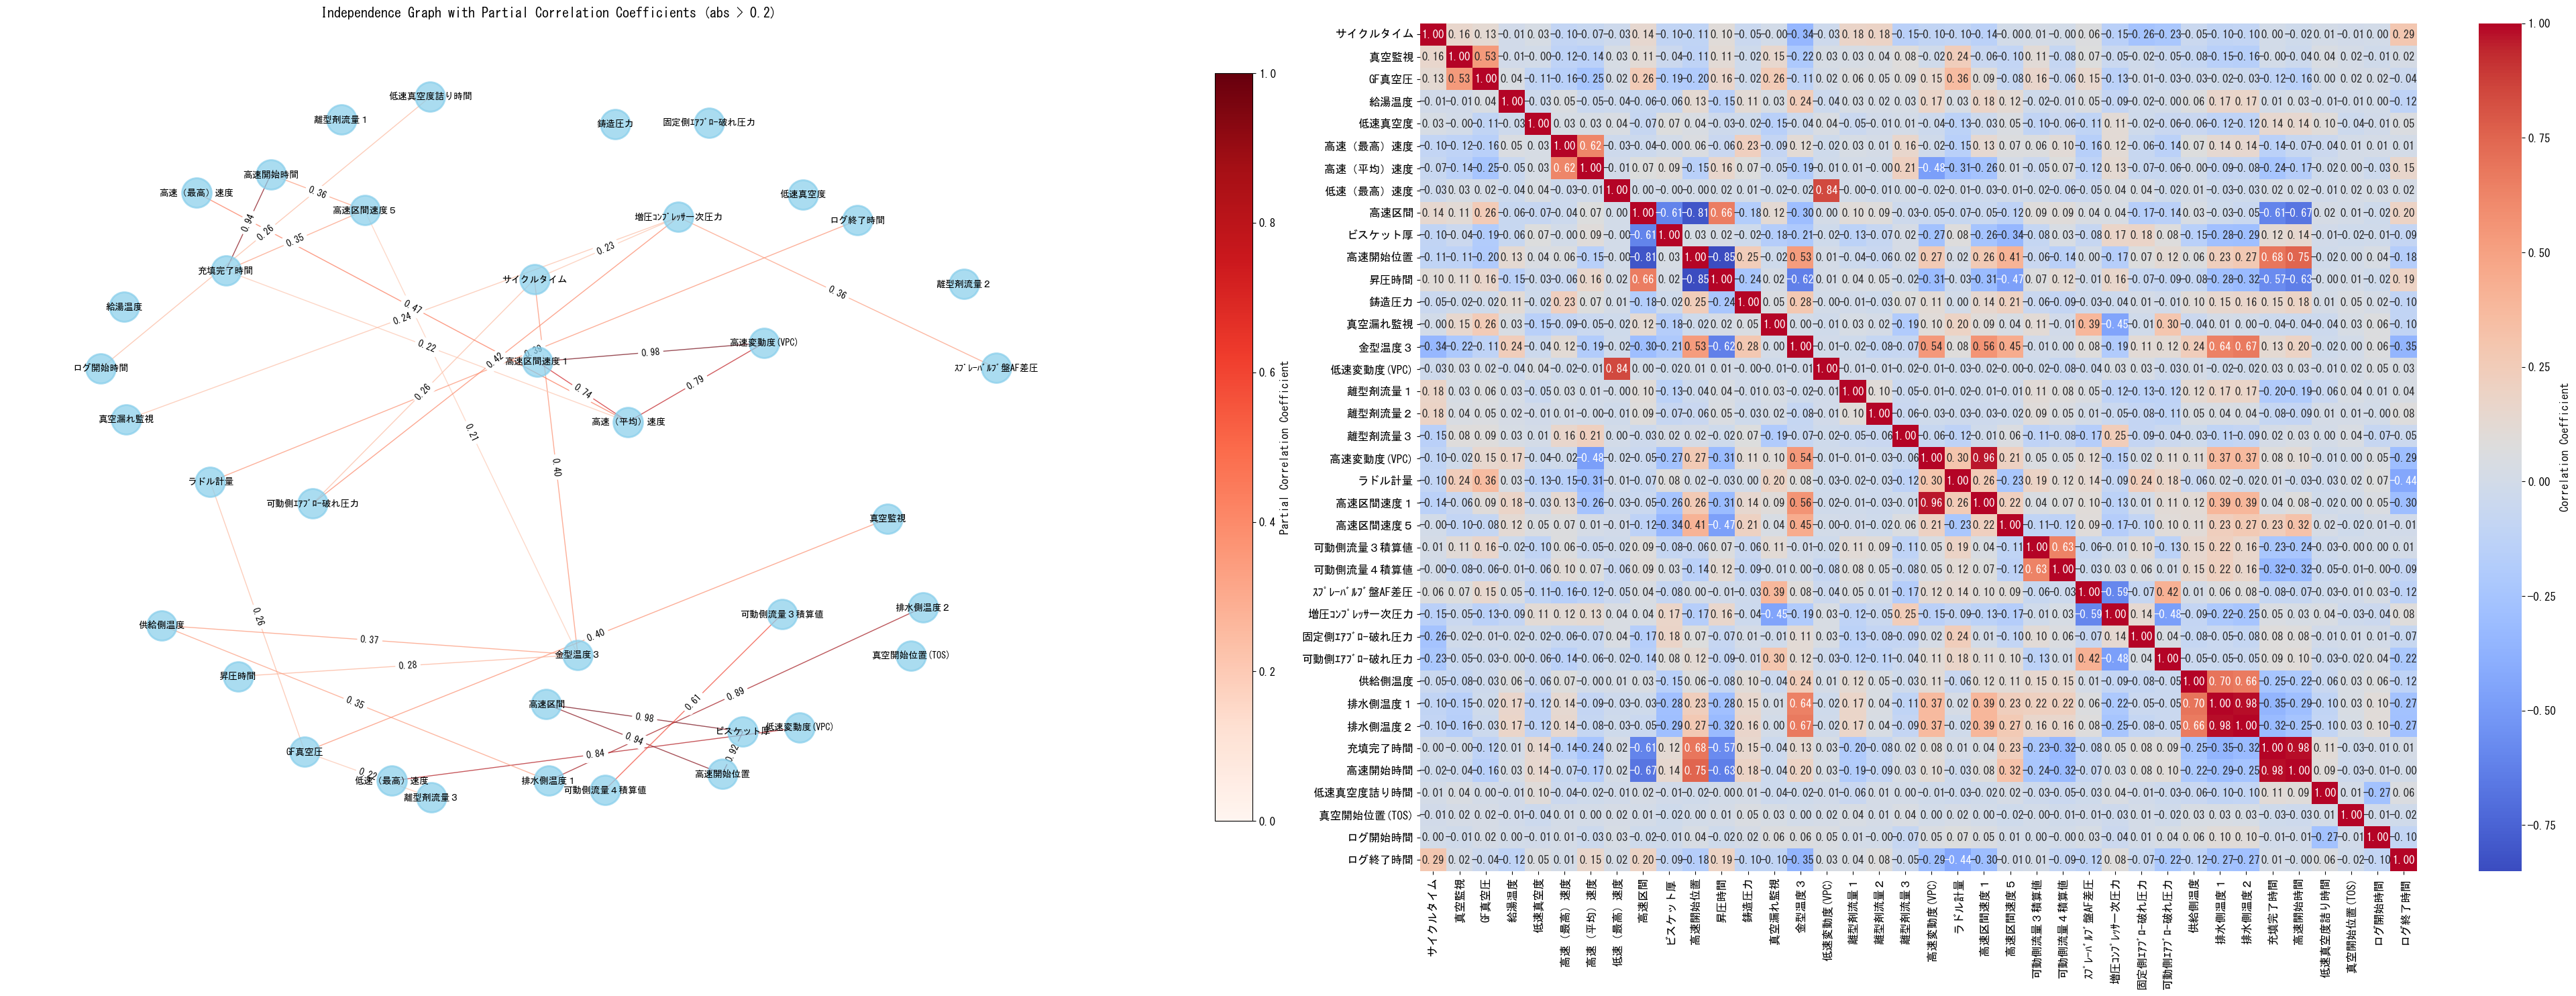

In [69]:
# spring layout
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 表示するノード間の最低偏相関係数を指定
thres = 0.2

filepass = r'C:\Notebook\231213_K15CCBcrack_analysis\pd4ana_3rd.xlsx'

# フォントの設定（IPAexフォントを使用）
font_path = r'C:\Windows\Fonts\msgothic.ttc'  # フォントのパスを適切に指定してください
font_prop = FontProperties(fname=font_path)

# その他の設定
plt.rcParams['font.family'] = font_prop.get_name()

# ファイルパスを指定してエクセルデータを読み込む
df = pd.read_excel(filepass, header=[0], index_col=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

# 独立グラフの作成
G = nx.Graph()

# 変数間の偏相関を計算し、エッジを追加
for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:
            partial_corr = pg.partial_corr(df, x=var1, y=var2, covar=list(set(df.columns) - {var1, var2}))
            partial_corr_value = partial_corr['r'].values[0]
            G.add_edge(var1, var2, weight=partial_corr_value)

# エッジの重みが閾値未満のものを削除
edges_to_remove = [(var1, var2) for var1, var2, weight in G.edges(data='weight') if abs(weight) <= thres]
G.remove_edges_from(edges_to_remove)

# Ensure all edge weights are non-negative
for _, _, data in G.edges(data=True):
    data['weight'] = abs(data['weight'])

# ノードの位置を設定 (spring_layoutを使用)
pos = nx.spring_layout(G, seed=42, k=1)  # seedを指定して再現性を確保 kでnode間の反発を指定

# カスタムカラーマップを作成
norm = Normalize(vmin=0, vmax=1)
cmap = plt.cm.get_cmap('Reds')

# サブプロットを作成
fig, axs = plt.subplots(1, 2, figsize=(40, 15))

# グラフの描画
weights = [abs(weight) for _, _, weight in G.edges(data='weight')]
edge_colors = [cmap(norm(weight)) for weight in weights]

nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color=edge_colors, linewidths=2, alpha=0.7, ax=axs[0])

# ノードのラベルを描画
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_family=font_prop.get_name(), font_size=10, font_color='black', ax=axs[0])

# エッジの重み（偏相関係数）を表示
edge_labels = {(i, j): f"{partial_corr_value:.2f}" for i, j, partial_corr_value in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family=font_prop.get_name(), ax=axs[0])

# グラフの描画
axs[0].set_title(f'Independence Graph with Partial Correlation Coefficients (abs > {thres})')

# 偏相関ヒートマップの描画
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1], cbar_kws={'label': 'Correlation Coefficient'})

# カラーバーの追加
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[0], orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Partial Correlation Coefficient')

# グラフを表示
plt.tight_layout()
plt.show()
